In [604]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

In [605]:
csv_city = "raw_data/city_data.csv"
csv_ride = "raw_data/ride_data.csv"

city_pd = pd.read_csv(csv_city)
ride_pd = pd.read_csv(csv_ride)

merged = pd.merge(ride_pd,city_pd, how="left", on=["city", "city"])
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [606]:
urban = merged[merged['type'] == 'Urban']
rural = merged[merged['type'] == 'Rural']
suburban = merged[merged['type'] == 'Suburban']

rural.head()

,city,date,fare,ride_id,driver_count,type
2282,Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
2283,Kinghaven,2016-05-18 23:28:12,20.53,6432117120069,3,Rural
2284,New Johnbury,2016-04-21 08:30:25,56.60,9002881309143,6,Rural
2285,South Joseph,2016-02-17 01:41:29,57.52,7365786843443,3,Rural
2286,Kennethburgh,2016-10-19 13:13:17,24.43,2728236352387,3,Rural


In [607]:
urban.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [608]:
suburban.head()

,city,date,fare,ride_id,driver_count,type
1625,Port James,2016-12-04 06:16:36,15.77,2259499336994,15,Suburban
1626,Port James,2016-12-04 06:16:36,15.77,2259499336994,3,Suburban
1627,New Samanthaside,2016-06-05 14:36:58,39.38,3647873452658,16,Suburban
1628,Port Alexandria,2016-07-29 09:30:09,24.86,2962960319234,27,Suburban
1629,Lake Brenda,2016-08-26 03:07:30,20.97,5231983896020,24,Suburban


In [609]:
# Get ride count, driver count, and average for Urban cities
ridecount_urban = urban.groupby(['city']).count()['ride_id']
average_urban = urban.groupby(['city']).mean()['fare']
drivercount_urban = urban.groupby(['city']).mean()['driver_count']

# Change to get the other results (i.e. average_urban & drivercount_urban)
drivercount_urban.head()

city
Alvarezhaven    21.0
Alyssaberg      67.0
Antoniomouth    21.0
Aprilchester    49.0
Arnoldview      41.0
Name: driver_count, dtype: float64

In [610]:
# Get ride count, driver count, and average for Rural cities (Copy and paste above, replace Urban with Rural)
ridecount_rural = rural.groupby(['city']).count()['ride_id']
average_rural = rural.groupby(['city']).mean()['fare']
drivercount_rural = rural.groupby(['city']).mean()['driver_count']

# Change to get the other results (i.e. ridecount_rural & drivercount_rural)
drivercount_rural.head()

city
East Leslie        9.0
East Stephen       6.0
East Troybury      3.0
Erikport           3.0
Hernandezshire    10.0
Name: driver_count, dtype: float64

In [611]:
# Get ride count, driver count, and average for Suburban cities (Copy and paste above, replace Rural with Suburban)
ridecount_suburban = suburban.groupby(['city']).count()['ride_id']
average_suburban = suburban.groupby(['city']).mean()['fare']
drivercount_suburban = suburban.groupby(['city']).mean()['driver_count']

# Change to get the other results (i.e. ridecount_suburban & drivercount_suburban)
drivercount_suburban.head()

city
Anitamouth      16.0
Campbellport    26.0
Carrollbury      4.0
Clarkstad       21.0
Conwaymouth     18.0
Name: driver_count, dtype: float64

In [612]:
#Uban Scatter plot
plot.scatter(ridecount_urban, average_urban, s=10*drivercount_urban, c="coral", edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

In [613]:
#Rural Scatter plot
plot.scatter(ridecount_rural, average_rural, s=10*drivercount_rural, c="gold", edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

In [614]:
# Suburban Scatter plot
plot.scatter(ridecount_suburban, average_suburban, s=10*drivercount_suburban, c="skyblue", edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Suburban")

In [615]:
# Graph labels
plot.title("Pyber Data 2016")
plot.ylabel("Average Fare")
plot.xlabel("Total Rides (City)")
plot.xlim((0,50))
plot.grid(True)

In [616]:
# Create a legend
lgnd = plot.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Types",
                   labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

In [617]:
# Save scatter plot  (Save scatter plot before showing, or nothing will save)
plot.savefig("charts/scatterplot.png")

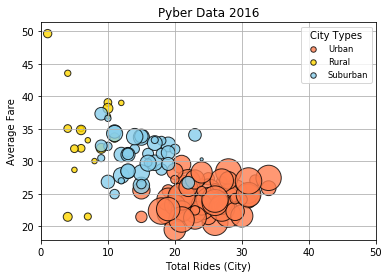

In [618]:
plot.show()

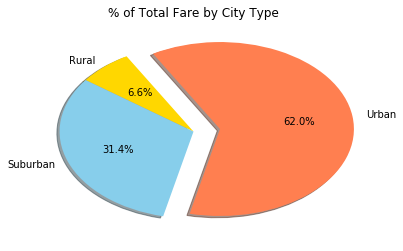

In [619]:
# % of Total Fare by City Type
percentage_by_type = 100 * merged.groupby(['type']).sum()['fare'] / merged['fare'].sum()

# Pie chart
plot.title('% of Total Fare by City Type')
plot.pie(percentage_by_type, labels=['Rural','Suburban','Urban'], colors=['gold','skyblue','coral'], explode=[0,0,0.2],
        autopct='%1.1f%%', shadow=True, startangle=120)

#Save before showing
plot.savefig('charts/faresByCity.png')
plot.show()

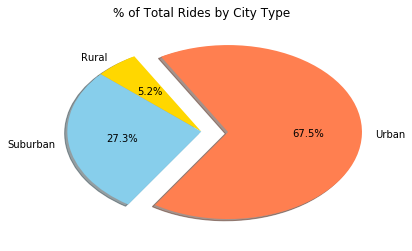

In [620]:
# % of Total Rides by City Type
percentage_rides = 100 * merged.groupby(['type']).count()['ride_id'] / merged['ride_id'].count()

# Pie chart
plot.title('% of Total Rides by City Type')
plot.pie(percentage_rides, labels=['Rural','Suburban','Urban'], colors=['gold','skyblue','coral'], explode=[0,0,0.2],
        autopct='%1.1f%%', shadow=True, startangle=120)

# Save before showing
plot.savefig('charts/ridesByCity.png')
plot.show()

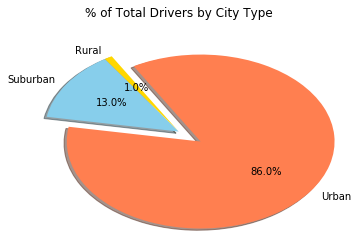

In [621]:
# % of Total Drivers by City Type
percentage_drivers = 100 * merged.groupby(['type']).sum()['driver_count'] / city_pd['driver_count'].sum()

# Pie Chart
plot.title('% of Total Drivers by City Type')
plot.pie(percentage_drivers, labels=['Rural','Suburban','Urban'], colors=['gold','skyblue','coral'], explode=[0,0,0.2],
        autopct='%1.1f%%', shadow=True, startangle=120)

# Save before showing
plot.savefig('charts/driversByCity.png')
plot.show()